# Schaff Trend Cycle (STC) 

https://www.indiainfoline.com/knowledge-center/online-share-trading/what-is-schaff-trend-cycle  
https://library.tradingtechnologies.com/trade/chrt-ti-schaff-trend-cycle.html  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208740,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617916,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761467,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019852,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550922,102349600


In [3]:
#def STC(df, cycle=10, smooth=3):
#    EMA1 = df['Close'].ewm(span=cycle, adjust=False).mean()
#    EMA2 = EMA1.ewm(span=cycle, adjust=False).mean()
#    MACD = EMA1 - EMA2
#    SignalLine = MACD.ewm(span=smooth, adjust=False).mean()
#    STC = SignalLine.ewm(span=smooth, adjust=False).mean()
#    return STC

# df['STC'] = STC(df, cycle=10, smooth=3)

In [4]:
# Define the period lengths for the indicator
short_period = 23
long_period = 50
cycle_period = 10

# Calculate the MACD of the close prices
df['macd'] = df['Adj Close'].ewm(span=short_period, min_periods=short_period-1).mean() - \
                df['Adj Close'].ewm(span=long_period, min_periods=long_period-1).mean()

# Calculate the signal line
df['signal'] = df['macd'].ewm(span=cycle_period, min_periods=cycle_period-1).mean()

# Calculate the Schaff Trend Cycle
df['STC'] = df['signal'].ewm(span=cycle_period, min_periods=cycle_period-1).mean()

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,signal,STC
Date,,,,,,,,,
2018-10-31,54.220001,55.112499,54.154999,54.715000,52.545734,153435600,-0.140428,-0.001534,0.086785
2018-11-01,54.762501,55.590000,54.202499,55.555000,53.352440,233292800,-0.103752,-0.020635,0.064221
2018-11-02,52.387501,53.412498,51.357498,51.869999,49.813538,365314800,-0.217922,-0.057315,0.039392
2018-11-05,51.075001,51.097500,49.542500,50.397499,48.399414,264654800,-0.376465,-0.116411,0.008263
2018-11-06,50.480000,51.180000,50.422501,50.942501,48.922806,127531600,-0.492930,-0.185896,-0.029844


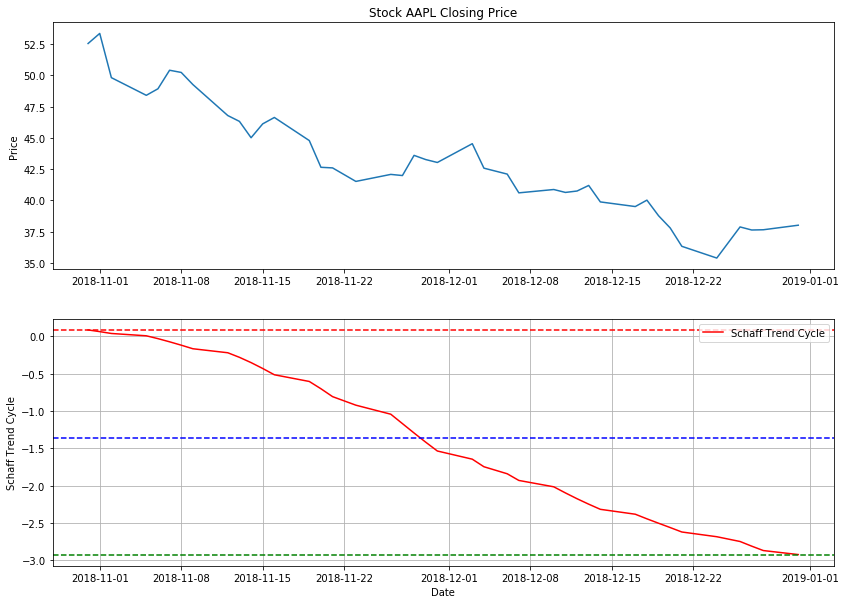

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['STC'], label='Schaff Trend Cycle', color='red')
ax2.axhline(y=df['STC'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['STC'].min(), color='green', linestyle='--')
ax2.axhline(y=df['STC'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Schaff Trend Cycle')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Schaff Trend Cycle

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,signal,STC,VolumePositive
0,736998.0,54.220001,55.112499,54.154999,54.715000,52.545734,153435600,-0.140428,-0.001534,0.086785,False
1,736999.0,54.762501,55.590000,54.202499,55.555000,53.352440,233292800,-0.103752,-0.020635,0.064221,False
2,737000.0,52.387501,53.412498,51.357498,51.869999,49.813538,365314800,-0.217922,-0.057315,0.039392,False
3,737003.0,51.075001,51.097500,49.542500,50.397499,48.399414,264654800,-0.376465,-0.116411,0.008263,False
4,737004.0,50.480000,51.180000,50.422501,50.942501,48.922806,127531600,-0.492930,-0.185896,-0.029844,False


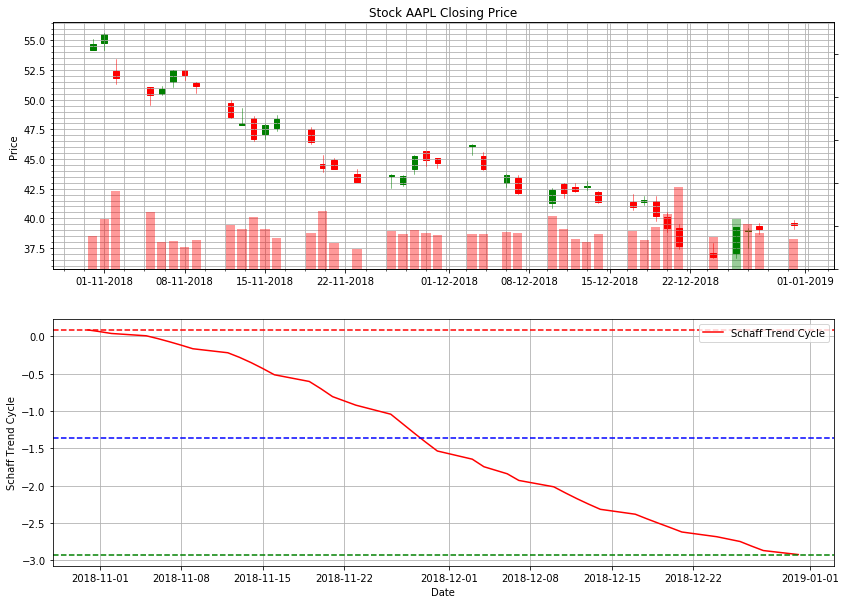

In [11]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['STC'], label='Schaff Trend Cycle', color='red')
ax2.axhline(y=df['STC'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['STC'].min(), color='green', linestyle='--')
ax2.axhline(y=df['STC'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Schaff Trend Cycle')
ax2.set_xlabel('Date')
ax2.legend(loc='best')